In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from tqdm import tqdm
import pickle
# import preconditioned_stochastic_gradient_descent as psgd

plt.style.use('seaborn')

## Sim Results

In [19]:
df_sim = pd.DataFrame(columns=['DAG Size','DAG Iter','SEM','Model','SNR','OOD Split_Num','Hamm','Iter','Test Loss'])

model_type = 'CGen'
model_name = 'CHGen'

for graph_size,graph_edges in [(5,5)]: # (4,4),(5,5),(5,8)
    for dag_iter in range(10):
        for dag_type in ['linear']: # 'linear,'nonlinear'
            for snr in [float('inf'),5]:
                load_dir = f'results/{graph_size}_{graph_edges}/{dag_iter}_{dag_type}_{model_type}_{snr}'
                losses_OD = pickle.load(open(f'{load_dir}/losses_OD.pkl','rb'))
                for split in losses_OD.keys():
                    for hamm in [0,1,2,3,4]:
                        for iter in range(losses_OD[split]['test'][hamm].shape[0]):
                          SHDN = losses_OD[split]['test'][str(hamm)+'_SHDN_'+str(iter)]
                          SHDP = losses_OD[split]['test'][str(hamm)+'_SHDP_'+str(iter)]
                          df_sim.loc[len(df_sim.index)] = [(graph_size,graph_edges),dag_iter,dag_type,model_name,snr,split,(hamm,SHDN,SHDP),iter,losses_OD[split]['test'][hamm][iter,-1]]
                

In [20]:
df_sim_comp = df_sim.pivot_table(values='Test Loss', index=df_sim.set_index(['DAG Size','SEM','Model','SNR','OOD Split_Num','Iter']).index, columns='Hamm', aggfunc='first')


In [22]:
probs = pd.DataFrame(columns=df_sim_comp.columns.to_list(),index=df_sim_comp.columns.to_list())

for i in df_sim_comp.columns.to_list():
  for j in df_sim_comp.columns.to_list():
    probs.at[i,j] = ((df_sim_comp[i] > df_sim_comp[j]))[~df_sim_comp[i].isna() & ~df_sim_comp[j].isna()].mean()

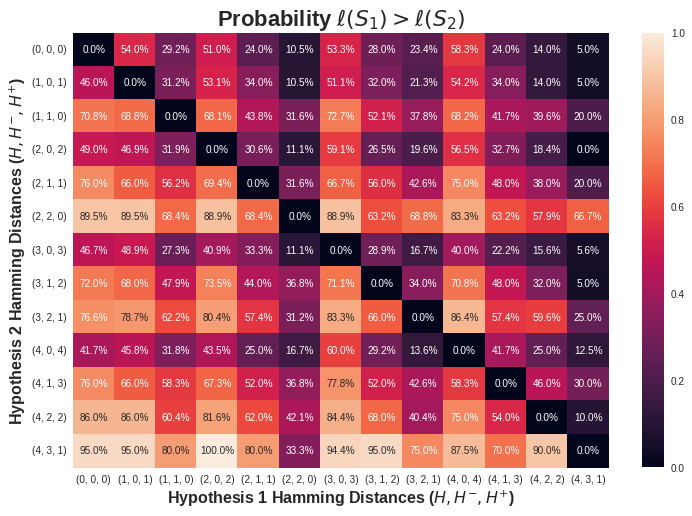

In [23]:
ax1 = plt.figure(figsize=(12,8))
sns.heatmap(probs.astype('float'),annot=True,fmt='.1%')
plt.xlabel('Hypothesis 1 Hamming Distances ($H,H^{-},H^{+}$)',fontsize=16,fontweight='bold')
plt.ylabel('Hypothesis 2 Hamming Distances ($H,H^{-},H^{+}$)',fontsize=16,fontweight='bold')
plt.title('Probability $\ell(S_1) > \ell(S_2)$',fontsize=22,fontweight='bold')
plt.savefig('Plots/5_5_linear_sims.png',bbox='tight')